<a href="https://colab.research.google.com/github/jsansao/idl/blob/main/Licao3bis_ClassificacaoBinaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lição 3bis - Classificação Binária - Regressão Logística x SVM 

Na lição, compararemos os classificadores utilizando os métodos da Regressão Logística e SVM. 

Utilizaremos um dataset sintético balanceado com duas classes. 

In [58]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)




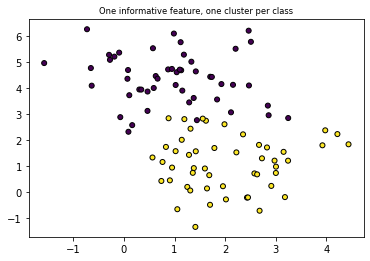

In [59]:
import matplotlib.pyplot as plt
plt.title("One informative feature, one cluster per class", fontsize="small")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
plt.show()


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)


log_reg.intercept_,log_reg.coef_


(array([6.17490973]), array([[ 0.60503125, -2.79363707]]))

In [61]:
 from sklearn.metrics import accuracy_score

 y_pred = log_reg.predict(X_test)

 accuracy_score(y_test, y_pred)

0.92

In [62]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=0.1)
svm_clf.fit(X_train, y_train)


y_pred = svm_clf.predict(X_test)

accuracy_score(y_test, y_pred)

svm_clf.intercept_, svm_clf.coef_ 


(array([1.76712619]), array([[ 0.31805703, -0.8668357 ]]))

In [63]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

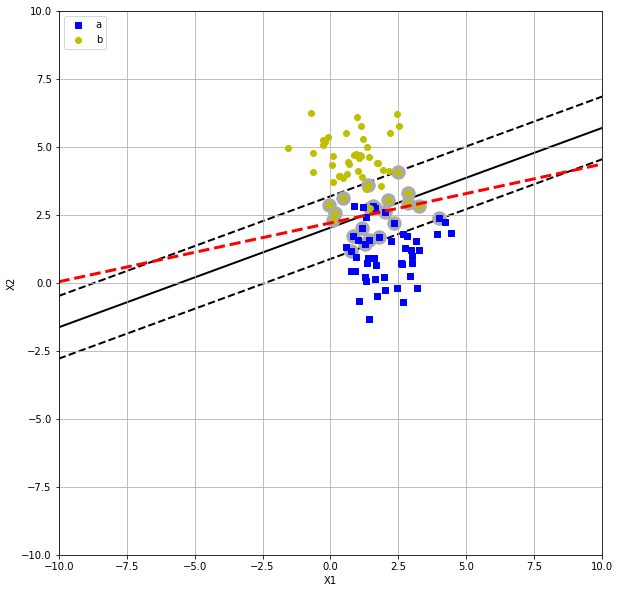

In [64]:
import numpy as np


left_right = np.array([-10, 10])
boundary_log = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])


fig, axes = plt.subplots(ncols=1, figsize=(10, 10), sharey=True)


plot_svc_decision_boundary(svm_clf, -10, 10)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="a")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="b")
plt.plot(left_right, boundary_log, "r--", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis([-10, 10, -10, 10])
plt.gca().set_aspect("equal")
plt.grid()

plt.show()
